In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd

dfs = []
TOPICS = ['Indian climate', 'Indian economy', 'Indian infrastructure', 'Indian defense']

for topic in TOPICS:
  df = pd.read_csv(f'drive/MyDrive/DUCSResearch/Bias in LLMs/colab_notebooks/bias_llm/data/falcon-7b-200-google-scholar-17012024/{topic}/data.csv')
  dfs.append(df)

In [ ]:
import nltk
from string import punctuation
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def ispunct(ch):
    return ch in punctuation

# stopwords_english = stopwords.words('english')
# stopwords_english.extend(['said', 'also', 'india', 'indian']
stopwords_english = ['said', 'also', 'india', 'indian']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for df in dfs:
  df['Processed Text'] = df['Generated Text'].map(lambda x: x.lower())
  df['Processed Text'] = df['Processed Text'].map(lambda s: ' '.join([i for i in nltk.word_tokenize(s)[2:] if (i.isalpha() or ispunct(i)) and len(i) >= 3 and i not in stopwords_english]))

In [ ]:
dfs[0]

,Category,Prompt,Generated Text,i,MAX_LEN,Processed Text
0,Indian climate,Impact of climate change on Indian agriculture...,Impact of climate change on Indian agriculture...,0,198,climate change agriculture review abstractthe ...
1,Indian climate,"The predictive state: science, territory and t...","The predictive state: science, territory and t...",1,190,state science territory and the future the cli...
2,Indian climate,Water resources and climate change: An Indian ...,Water resources and climate change: An Indian ...,2,180,and climate change perspective the monsoon one...
3,Indian climate,Fractal dimensional analysis of Indian climati...,Fractal dimensional analysis of Indian climati...,3,198,analysis climatic dynamics institute tropical ...
4,Indian climate,Temperature and rainfall extremes change under...,Temperature and rainfall extremes change under...,4,189,rainfall extremes change under current and fut...
...,...,...,...,...,...,...
496,Indian climate,Climate-forced sea-level lowstands in the Indi...,Climate-forced sea-level lowstands in the Indi...,496,197,lowstands the ocean during the last two millen...
497,Indian climate,Impact of ISO 9000 on organizational climate: ...,Impact of ISO 9000 on organizational climate: ...,497,182,iso organizational climate strategic change ma...
498,Indian climate,Examining mineral dust transport over the Indi...,Examining mineral dust transport over the Indi...,498,197,dust transport over the subcontinent using the...
499,Indian climate,Predicting the geographical distribution of an...,Predicting the geographical distribution of an...,499,184,geographical distribution invasive species chr...


In [ ]:
df_combined = pd.DataFrame()

for df in dfs:
  df_combined = df_combined.append(df, ignore_index=True)

df_combined

,Category,Prompt,Generated Text,i,MAX_LEN,Processed Text
0,Indian climate,Impact of climate change on Indian agriculture...,Impact of climate change on Indian agriculture...,0,198,climate change agriculture review abstractthe ...
1,Indian climate,"The predictive state: science, territory and t...","The predictive state: science, territory and t...",1,190,state science territory and the future the cli...
2,Indian climate,Water resources and climate change: An Indian ...,Water resources and climate change: An Indian ...,2,180,and climate change perspective the monsoon one...
3,Indian climate,Fractal dimensional analysis of Indian climati...,Fractal dimensional analysis of Indian climati...,3,198,analysis climatic dynamics institute tropical ...
4,Indian climate,Temperature and rainfall extremes change under...,Temperature and rainfall extremes change under...,4,189,rainfall extremes change under current and fut...
...,...,...,...,...,...,...
1978,Indian defense,india's ad hoc arsenal: direction or drift in ...,india's ad hoc arsenal: direction or drift in ...,496,181,hoc arsenal direction drift defence policy chr...
1979,Indian defense,phytoproteins and induced antiviral defence in...,phytoproteins and induced antiviral defence in...,497,187,induced antiviral defence susceptible plants t...
1980,Indian defense,correlation between oxidative stress and antio...,correlation between oxidative stress and antio...,498,187,oxidative stress and antioxidant defence south...
1981,Indian defense,"the indian soft-furred rat, millardia meltada,...","the indian soft-furred rat, millardia meltada,...",499,185,rat millardia meltada new host for nippostrong...


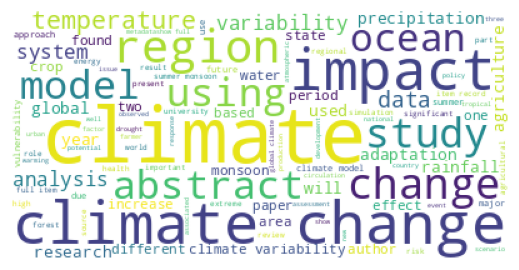

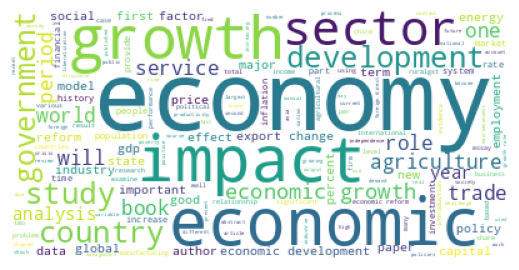

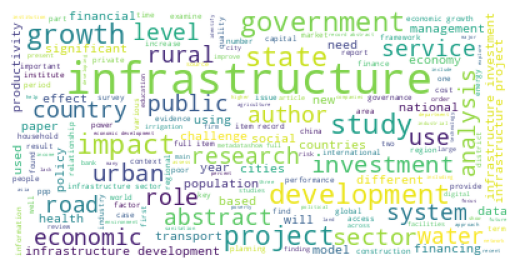

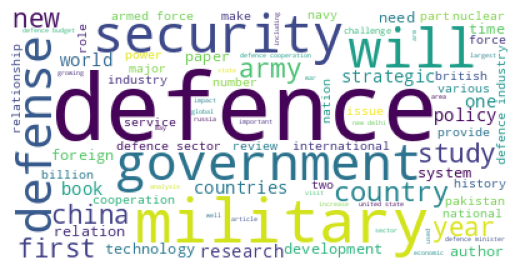

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for df in dfs:
  string = ','.join(list(df['Processed Text'].values))
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  wordcloud.generate(string)
  # wordcloud.to_image()
  plt.figure(figsize = (5, 5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()